In [1]:
from typing import List, TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation: str
    operation2: str
    finalNumber: int
    finalNumber2: int

In [3]:
def add(state: AgentState)-> AgentState:
    print('add', state)
    state['finalNumber'] =  state['number1'] + state['number2']
    return state
def add2(state: AgentState)-> AgentState:
    print('add2', state)
    state['finalNumber2'] =  state['number3'] + state['number4']
    return state

def sub(state: AgentState)-> AgentState:
    print('sub', state)
    state['finalNumber'] =  state['number1'] - state['number2']
    return state
def sub2(state: AgentState)-> AgentState:
    print('sub2', state)
    state['finalNumber2'] =  state['number3'] - state['number4']
    return state

def cond(state: AgentState) -> AgentState:
    if state['operation'] == '+':
        return 'add1_edge'
    if state['operation'] == '-':
        return 'sub1_edge'
    
def cond2(state: AgentState) -> AgentState:
    print('cond2', state)
    if state['operation2'] == '+':
        return 'add2_edge'
    if state['operation2'] == '-':
        return 'sub2_edge'    
graph = StateGraph(AgentState)

In [4]:
graph.add_node('add1', add)
graph.add_node('add2', add2)
graph.add_node('sub1', sub)
graph.add_node('sub2', sub2)
graph.add_node('router', lambda state: state)
graph.add_node('router2', lambda state: state)
graph.add_edge(START, 'router')
graph.add_conditional_edges('router', cond, {
    'add1_edge': 'add1',
    'sub1_edge': 'sub1' 
})
graph.add_edge('add1', 'router2')
graph.add_edge('sub1', 'router2')
graph.add_conditional_edges('router2', cond2, {
    'add2_edge': 'add2',
    'sub2_edge': 'sub2' 
})
graph.add_edge('add2', END)
graph.add_edge('sub2', END)


app = graph.compile()

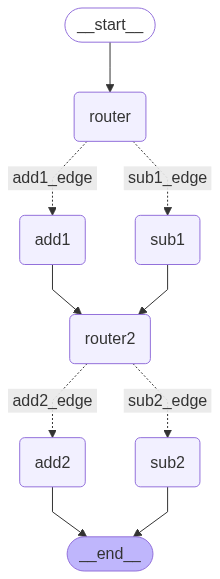

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
user_agent2 = AgentState(finalNumber=0, finalNumber2=0, number1=10, number2=5, number3=2, number4=7, operation='+', operation2='-')

app.invoke(user_agent2)

add {'number1': 10, 'number2': 5, 'number3': 2, 'number4': 7, 'operation': '+', 'operation2': '-', 'finalNumber': 0, 'finalNumber2': 0}
cond2 {'number1': 10, 'number2': 5, 'number3': 2, 'number4': 7, 'operation': '+', 'operation2': '-', 'finalNumber': 15, 'finalNumber2': 0}
sub2 {'number1': 10, 'number2': 5, 'number3': 2, 'number4': 7, 'operation': '+', 'operation2': '-', 'finalNumber': 15, 'finalNumber2': 0}


{'number1': 10,
 'number2': 5,
 'number3': 2,
 'number4': 7,
 'operation': '+',
 'operation2': '-',
 'finalNumber': 15,
 'finalNumber2': -5}